# F1 Race Prediction

## 1.Introduction

Formula One, commonly known as Formula 1 or F1, is the highest class of international racing for open-wheel single-seater formula racing cars sanctioned by the Fédération Internationale de l'Automobile (FIA). The word formula in the name refers to the set of rules to which all participants' cars must conform. A Formula One season consists of a series of races, known as Grands Prix. Grands Prix take place in multiple countries and continents around the world on either purpose-built circuits or closed public roads [1]. Sport is a perfect combination of athlete talent, engineering precision. Each upgrade of the car parts or driver's value is driven by the data collceted on track and off track. In this paper, we will evaluate the driver's performance done by them on the track...


## 2.Comparision done by other papers
    TODO

## 3.Technology used in this paper
The paper there are shown different number of python libraries, which helps us making faster calculations and having prebuilt models already available to us. Numpy helps us make fast calculations using C code as the backend. Scikit-learn  helps in preprocessing, data spliting and having different ML models available to us. Matplotlib to help us visualize our data. Pandas for data....

## 4. Data Preperation

Our data is available from a Kaggle dataset [kaggle], which is compiled from Ergast [Ergast]. We have plenty of data about everything, circuits, races, results of the races, qualifying,lap times of the race and the constructor, driver standings etc. Not every data will be important to us. As mentioned before hand we want to predict which drivers will achieve a podium, points, no points finish before the race starts. First we need to look at what data will be important.

In [3]:
# importing required libraries 

import warnings
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.model_selection import cross_val_score,StratifiedKFold,RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,precision_score,f1_score,recall_score
from sklearn.neural_network import MLPClassifier, MLPRegressor
warnings.simplefilter("ignore")
pd.set_option('display.max_columns', None)

result_df = pd.read_csv('./formula1_data/results.csv')
stats_df = pd.read_csv('./formula1_data/status.csv')
drivers_df = pd.read_csv('./formula1_data/drivers.csv')
races_df = pd.read_csv('./formula1_data/races.csv')
constructor_df = pd.read_csv('./formula1_data/constructors.csv')
laptimes_df = pd.read_csv("./formula1_data/lap_times.csv")
driver_standings_df = pd.read_csv('./formula1_data/driver_standings.csv')
qualifying_df = pd.read_csv("./formula1_data/qualifying.csv")
circuits_df = pd.read_csv("./formula1_data/circuits.csv")
pd.get_option("display.max_columns",None)

races_df.drop(["date","time","url","fp1_date","fp1_time","fp2_date","fp2_time","fp3_date","fp3_time","quali_date","quali_time","sprint_date","sprint_time"],axis=1,inplace=True)



In [4]:
result_df.head()


,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [5]:
stats_df.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [6]:
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [7]:
races_df.head()

,raceId,year,round,circuitId,name
0,1,2009,1,1,Australian Grand Prix
1,2,2009,2,2,Malaysian Grand Prix
2,3,2009,3,17,Chinese Grand Prix
3,4,2009,4,3,Bahrain Grand Prix
4,5,2009,5,4,Spanish Grand Prix


In [8]:
constructor_df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [9]:
driver_standings_df.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [10]:
drivers_df['driver_name'] = drivers_df['forename'] + ' '+drivers_df['surname']
drivers_df.drop(['forename','surname'],axis=1,inplace=True)
drivers_df

,driverId,driverRef,number,code,dob,nationality,url,driver_name
0,1,hamilton,44,HAM,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,Lewis Hamilton
1,2,heidfeld,\N,HEI,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld,Nick Heidfeld
2,3,rosberg,6,ROS,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg,Nico Rosberg
3,4,alonso,14,ALO,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso,Fernando Alonso
4,5,kovalainen,\N,KOV,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen,Heikki Kovalainen
...,...,...,...,...,...,...,...,...
852,854,mick_schumacher,47,MSC,1999-03-22,German,http://en.wikipedia.org/wiki/Mick_Schumacher,Mick Schumacher
853,855,zhou,24,ZHO,1999-05-30,Chinese,http://en.wikipedia.org/wiki/Zhou_Guanyu,Guanyu Zhou
854,856,de_vries,21,DEV,1995-02-06,Dutch,http://en.wikipedia.org/wiki/Nyck_de_Vries,Nyck de Vries
855,857,piastri,81,PIA,2001-04-06,Australian,http://en.wikipedia.org/wiki/Oscar_Piastri,Oscar Piastri


Above us we will what is available to us. There's no need for data cleaning, because there's no NA available to us. We will add a new column in the results dataframe Constructor DNF and Driver DNF. These are important stats because it shows two attributes, one is for the driver it shows how consistent is the driver in making mistakes, second one is for the reliability of the car. If a car doesn't finish 10% of the races it means that the driver has less chances of finishing the race in points.

In [11]:
result_df['driver_dnf'] = result_df['statusId'].apply(lambda x: 1 if x in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137] else 0)
result_df['const_dnf'] = result_df['statusId'].apply(lambda x: 1 if x not in [3,4,20,29,31,41,68,73,81,97,82,104,107,130,137,1] else 0)


In [12]:


df1 = pd.merge(races_df,result_df,how='inner',on=['raceId'])
df2 = pd.merge(df1,qualifying_df,how='inner',on=['raceId','driverId','constructorId'])
df3 = pd.merge(df2,drivers_df,how='inner',on=['driverId'])
df4 = pd.merge(df3,constructor_df,how='inner',on=['constructorId'])
df5 = pd.merge(df4,circuits_df,how='inner',on=['circuitId'])
df5.head()

,raceId,year,round,circuitId,name_x,resultId,driverId,constructorId,number_x,grid,position_x,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId,driver_dnf,const_dnf,qualifyId,number_y,position_y,q1,q2,q3,driverRef,number,code,dob,nationality_x,url_x,driver_name,constructorRef,name_y,nationality_y,url_y,circuitRef,name,location,country,lat,lng,alt,url
0,1,2009,1,1,Australian Grand Prix,7554,18,23,22,1,1,1,1,10.0,58,1:34:15.784,5655784,17,3,1:28.020,216.891,1,0,0,2986,22,1,1:25.211,1:24.855,1:26.202,button,22,BUT,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,Jenson Button,brawn,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
1,1,2009,1,1,Australian Grand Prix,7555,22,23,23,2,2,2,2,8.0,58,+0.807,5656591,43,14,1:29.066,214.344,1,0,0,2987,23,2,1:25.006,1:24.783,1:26.505,barrichello,\N,BAR,1972-05-23,Brazilian,http://en.wikipedia.org/wiki/Rubens_Barrichello,Rubens Barrichello,brawn,Brawn,British,http://en.wikipedia.org/wiki/Brawn_GP,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
2,18,2008,1,1,Australian Grand Prix,18,18,11,16,12,\N,R,18,0.0,0,\N,\N,\N,\N,\N,\N,4,1,0,13,16,13,1:26.712,1:26.259,\N,button,22,BUT,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,Jenson Button,honda,Honda,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
3,36,2007,1,1,Australian Grand Prix,383,18,11,7,14,15,15,15,0.0,57,\N,\N,42,17,1:28.387,215.991,11,0,1,382,7,14,1:27.540,1:27.264,\N,button,22,BUT,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,Jenson Button,honda,Honda,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...
4,55,2006,3,1,Australian Grand Prix,796,18,11,12,1,10,10,10,0.0,56,\N,\N,17,8,1:27.799,217.437,11,0,1,787,12,1,1:28.081,1:26.337,1:25.229,button,22,BUT,1980-01-19,British,http://en.wikipedia.org/wiki/Jenson_Button,Jenson Button,honda,Honda,Japanese,http://en.wikipedia.org/wiki/Honda_Racing_F1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.968,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...


Here we need to make a dataset, which can we use for training our model. We won't be needing any of the races, circuits id, laps, fastestLap, finishing position and so on. We will only need our driver's qualifying position, driver dnf,

In [13]:
data = df5.drop(['round','circuitId','time','url_x','resultId','driverId',
                 'constructorId','number_x','positionText','position_x',
                 'positionOrder','laps','rank',
                 'fastestLapTime','fastestLapSpeed','qualifyId','driverRef','number','code','url_y','circuitRef','dob',
                 'location','lat','statusId','lng','alt','number_y','points','constructorRef','name_x','raceId','fastestLap','q2','q3','milliseconds','q1','url'],axis=1,inplace=False)
data = data[data['year'] >= 2021]
print(data.columns)


Index(['year', 'grid', 'statusId', 'driver_dnf', 'const_dnf', 'position_y',
       'nationality_x', 'driver_name', 'name_y', 'nationality_y', 'name',
       'country'],
      dtype='object')

In [14]:
data.rename(columns={'grid':'quali_pos','name_y':'constructor','position_y':'finish_pos','nationality_x':'driver_nat','nationality_y':'const_nat','name':'GP_name'},inplace=True)
data

,year,quali_pos,statusId,driver_dnf,const_dnf,finish_pos,driver_nat,driver_name,constructor,const_nat,GP_name,country
97,2022,20,1,0,0,16,Thai,Alexander Albon,Williams,British,Albert Park Grand Prix Circuit,Australia
98,2023,8,3,1,0,8,Thai,Alexander Albon,Williams,British,Albert Park Grand Prix Circuit,Australia
100,2022,18,11,0,1,19,Canadian,Nicholas Latifi,Williams,British,Albert Park Grand Prix Circuit,Australia
101,2023,18,4,1,0,18,American,Logan Sargeant,Williams,British,Albert Park Grand Prix Circuit,Australia
140,2022,7,1,0,0,7,Australian,Daniel Ricciardo,McLaren,British,Albert Park Grand Prix Circuit,Australia
...,...,...,...,...,...,...,...,...,...,...,...,...
9800,2021,18,11,0,1,18,Italian,Antonio Giovinazzi,Alfa Romeo,Swiss,Losail International Circuit,Qatar
9801,2021,19,11,0,1,19,German,Mick Schumacher,Haas F1 Team,American,Losail International Circuit,Qatar
9802,2021,20,12,0,1,20,Russian,Nikita Mazepin,Haas F1 Team,American,Losail International Circuit,Qatar
9803,2021,2,11,0,1,4,French,Pierre Gasly,AlphaTauri,Italian,Losail International Circuit,Qatar


In [15]:
pd.unique(data['driver_nat'])

array(['Thai', 'Canadian', 'American', 'Australian', 'British', 'Spanish',
       'Monegasque', 'French', 'German', 'Mexican', 'Dutch', 'Finnish',
       'Chinese', 'Danish', 'Japanese', 'Italian', 'Russian', 'Polish'],
      dtype=object)

In [16]:
pd.unique(data['const_nat'])

array(['British', 'Italian', 'French', 'German', 'Austrian', 'Swiss',
       'American'], dtype=object)

In [17]:

pd.unique(data['country'])

array(['Australia', 'Bahrain', 'Spain', 'Monaco', 'Turkey', 'UK',
       'Hungary', 'Belgium', 'Italy', 'Singapore', 'Japan', 'Brazil',
       'UAE', 'Canada', 'Austria', 'Russia', 'Azerbaijan', 'USA',
       'Mexico', 'France', 'Portugal', 'Saudi Arabia', 'Netherlands',
       'Qatar'], dtype=object)

In [18]:


data['driver_nat'] = data['driver_nat'].apply(lambda x: str(x)[:3])
data['const_nat'] = data['const_nat'].apply(lambda x: str(x)[:3])
data['country'] = data['country'].apply(lambda x: str(x)[:3])
data['country'] = data['country'].apply(lambda x: 'Bri' if x=='UK' else x)
data['country'] = data['country'].apply(lambda x: 'Ame' if x=='USA' else x)
data['country'] = data['country'].apply(lambda x: 'Fre' if x=='Fra' else x)
data['driver_home'] = data['driver_nat'] == data['country']
data['const_home'] = data['const_nat'] == data['country']
data['driver_home'] = data['driver_home'].apply(lambda x: int(x))
data['const_home'] = data['const_home'].apply(lambda x: int(x))
data.head()



,year,quali_pos,statusId,driver_dnf,const_dnf,finish_pos,driver_nat,driver_name,constructor,const_nat,GP_name,country,driver_home,const_home
97,2022,20,1,0,0,16,Tha,Alexander Albon,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0
98,2023,8,3,1,0,8,Tha,Alexander Albon,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0
100,2022,18,11,0,1,19,Can,Nicholas Latifi,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0
101,2023,18,4,1,0,18,Ame,Logan Sargeant,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0
140,2022,7,1,0,0,7,Aus,Daniel Ricciardo,McLaren,Bri,Albert Park Grand Prix Circuit,Aus,1,0


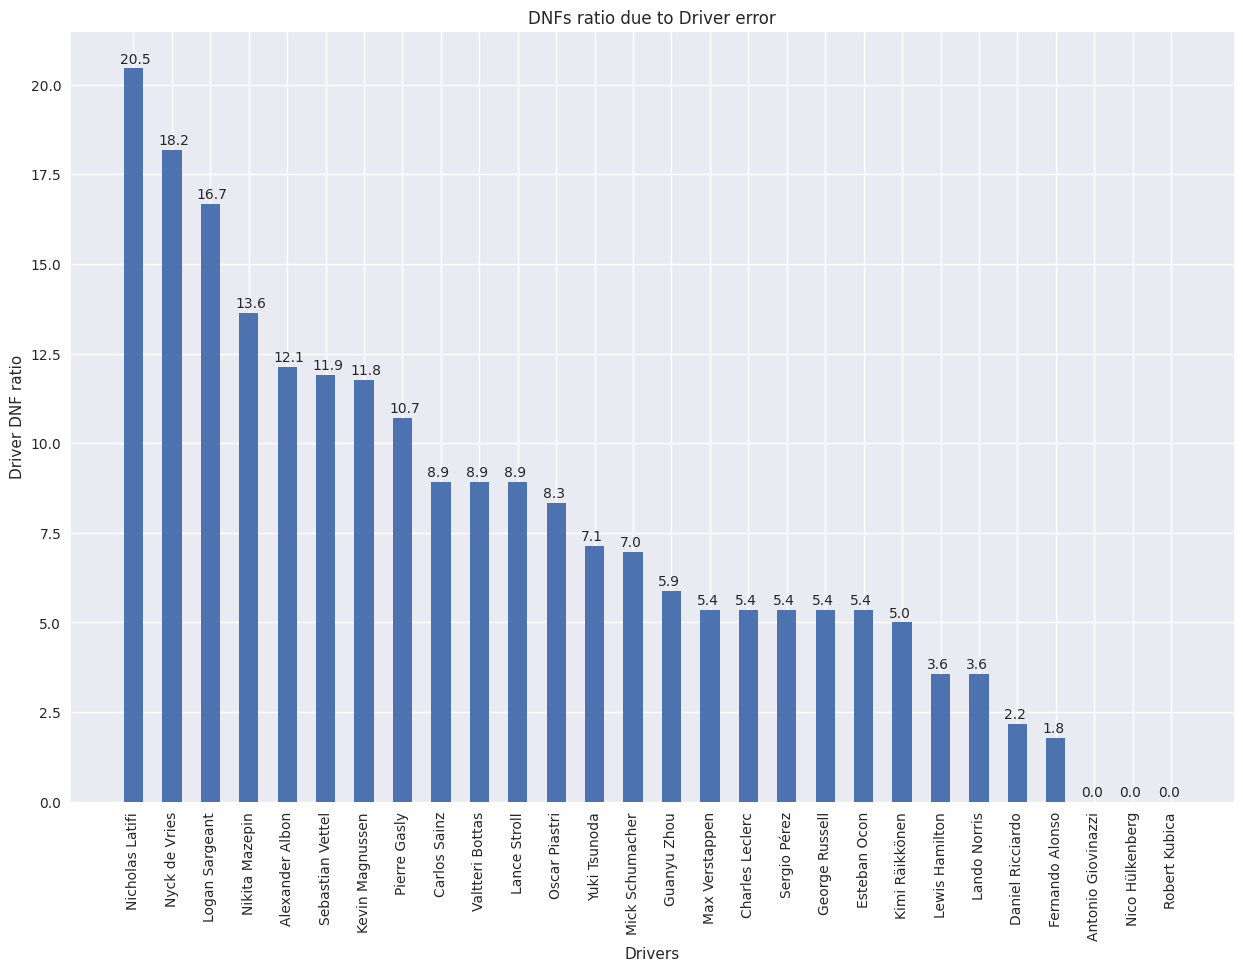

In [19]:
dnf_by_driver= data.groupby('driver_name').sum()['driver_dnf']
drivers_race_entered = data.groupby('driver_name').count()['driver_dnf']
driver_dnf_ratio = (dnf_by_driver*100/drivers_race_entered).sort_values(ascending=False)
plt.figure(figsize=(15,10))
bars = plt.bar(x=driver_dnf_ratio.index,height=driver_dnf_ratio,align='center',width=0.5)
plt.xticks(rotation=90)
plt.xlabel('Drivers')
plt.ylabel('Driver DNF ratio (%)')
plt.title('DNFs ratio due to Driver error')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()-0.1,yval+0.15,f'{round(yval,1)}')
plt.show()

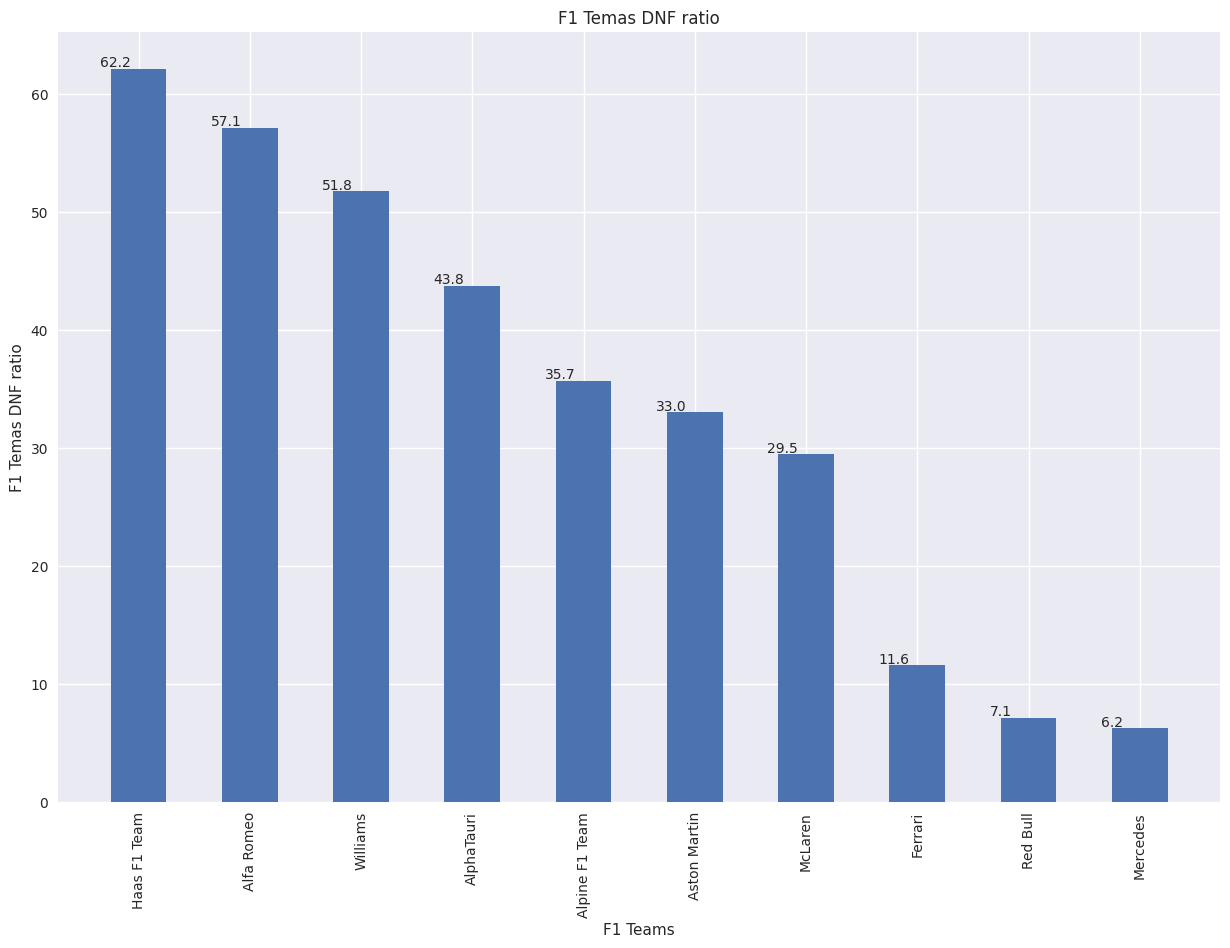

In [20]:
dnf_by_constructor = data.groupby('constructor').sum()['const_dnf']
constructor_race_entered = data.groupby('constructor').count()['const_dnf']
constructor_dnf_ratio = (dnf_by_constructor*100/constructor_race_entered).sort_values(ascending=False)
plt.figure(figsize=(15,10))
bars = plt.bar(x=constructor_dnf_ratio.index,height=constructor_dnf_ratio,align='center',width=0.5)
plt.xticks(rotation=90)
plt.xlabel('F1 Teams')
plt.ylabel('F1 Teams DNF ratio')
plt.title('F1 Teams DNF ratio')
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x()-0.1,yval+0.15,f'{round(yval,1)}')
plt.show()

In [21]:
driver_confidence = 1 - (dnf_by_driver/drivers_race_entered)
driver_confidence_dict = dict(zip(driver_confidence.index,driver_confidence))


In [22]:
driver_confidence_dict

{'Alexander Albon': 0.8787878787878788,
 'Antonio Giovinazzi': 1.0,
 'Carlos Sainz': 0.9107142857142857,
 'Charles Leclerc': 0.9464285714285714,
 'Daniel Ricciardo': 0.9782608695652174,
 'Esteban Ocon': 0.9464285714285714,
 'Fernando Alonso': 0.9821428571428571,
 'George Russell': 0.9464285714285714,
 'Guanyu Zhou': 0.9411764705882353,
 'Kevin Magnussen': 0.8823529411764706,
 'Kimi Räikkönen': 0.95,
 'Lance Stroll': 0.9107142857142857,
 'Lando Norris': 0.9642857142857143,
 'Lewis Hamilton': 0.9642857142857143,
 'Logan Sargeant': 0.8333333333333334,
 'Max Verstappen': 0.9464285714285714,
 'Mick Schumacher': 0.9302325581395349,
 'Nicholas Latifi': 0.7954545454545454,
 'Nico Hülkenberg': 1.0,
 'Nikita Mazepin': 0.8636363636363636,
 'Nyck de Vries': 0.8181818181818181,
 'Oscar Piastri': 0.9166666666666666,
 'Pierre Gasly': 0.8928571428571429,
 'Robert Kubica': 1.0,
 'Sebastian Vettel': 0.8809523809523809,
 'Sergio Pérez': 0.9464285714285714,
 'Valtteri Bottas': 0.9107142857142857,
 'Yuki T

In [23]:
const_confidence = 1 - (dnf_by_constructor/constructor_race_entered)
const_confidence_dict = dict(zip(const_confidence.index,const_confidence))

In [24]:
const_confidence_dict

{'Alfa Romeo': 0.4285714285714286,
 'AlphaTauri': 0.5625,
 'Alpine F1 Team': 0.6428571428571428,
 'Aston Martin': 0.6696428571428572,
 'Ferrari': 0.8839285714285714,
 'Haas F1 Team': 0.3783783783783784,
 'McLaren': 0.7053571428571428,
 'Mercedes': 0.9375,
 'Red Bull': 0.9285714285714286,
 'Williams': 0.4821428571428571}

In [25]:
data['driver_confidence'] = data['driver_name'].apply(lambda x:driver_confidence_dict[x])
data['const_reliability'] = data['constructor'].apply(lambda x:const_confidence_dict[x])

In [26]:
data.head()

,year,quali_pos,statusId,driver_dnf,const_dnf,finish_pos,driver_nat,driver_name,constructor,const_nat,GP_name,country,driver_home,const_home,driver_confidence,const_reliability
97,2022,20,1,0,0,16,Tha,Alexander Albon,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0,0.878788,0.482143
98,2023,8,3,1,0,8,Tha,Alexander Albon,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0,0.878788,0.482143
100,2022,18,11,0,1,19,Can,Nicholas Latifi,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0,0.795455,0.482143
101,2023,18,4,1,0,18,Ame,Logan Sargeant,Williams,Bri,Albert Park Grand Prix Circuit,Aus,0,0,0.833333,0.482143
140,2022,7,1,0,0,7,Aus,Daniel Ricciardo,McLaren,Bri,Albert Park Grand Prix Circuit,Aus,1,0,0.978261,0.705357


In [27]:
def position_index(x):
    if x == 1:
        return 1
    if x > 4:
        return 2
    if x > 11:
        return 3
    else:
        return 4

In [41]:
x_d = data[['GP_name','driver_name','quali_pos','driver_confidence']]
y_d = data['finish_pos'].apply(lambda x: position_index(x))

In [42]:
x_d

,GP_name,driver_name,quali_pos,driver_confidence
97,Albert Park Grand Prix Circuit,Alexander Albon,20,0.878788
98,Albert Park Grand Prix Circuit,Alexander Albon,8,0.878788
100,Albert Park Grand Prix Circuit,Nicholas Latifi,18,0.795455
101,Albert Park Grand Prix Circuit,Logan Sargeant,18,0.833333
140,Albert Park Grand Prix Circuit,Daniel Ricciardo,7,0.978261
...,...,...,...,...
9800,Losail International Circuit,Antonio Giovinazzi,18,1.000000
9801,Losail International Circuit,Mick Schumacher,19,0.930233
9802,Losail International Circuit,Nikita Mazepin,20,0.863636
9803,Losail International Circuit,Pierre Gasly,2,0.892857


In [43]:
y_d

97      2
98      2
100     2
101     2
140     2
       ..
9800    2
9801    2
9802    2
9803    4
9804    2
Name: finish_pos, Length: 1119, dtype: int64

In [49]:
sc = StandardScaler()
le = LabelEncoder()

x_d['GP_name']=le.fit_transform(x_d['GP_name'])
x_d['driver_name'] = le.fit_transform(x_d['driver_name'])
x_d

,GP_name,driver_name,quali_pos,driver_confidence
97,0,0,20,0.878788
98,0,0,8,0.878788
100,0,17,18,0.795455
101,0,14,18,0.833333
140,0,4,7,0.978261
...,...,...,...,...
9800,18,1,18,1.000000
9801,18,16,19,0.930233
9802,18,19,20,0.863636
9803,18,22,2,0.892857


In [47]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_dri = []
results_dri = []
name_dri = []
for model in models:
    cv = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
    result = cross_val_score(model,x_d,y_d,cv=cv,scoring='accuracy')
    print(result)
    mean_results_dri.append(result.mean())
    results_dri.append(result)
    name_dri.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

[0.83035714 0.84821429 0.85714286 0.84821429 0.86995516]
LogisticRegression : 0.8507767456758488
[0.875      0.91071429 0.92857143 0.91071429 0.91928251]
DecisionTreeClassifier : 0.9088565022421525
[0.91517857 0.94642857 0.95535714 0.92410714 0.94618834]
RandomForestClassifier : 0.9374519538757207
[0.82589286 0.86160714 0.86607143 0.87053571 0.88340807]
SVC : 0.8615030429212045
[0.83482143 0.87053571 0.875      0.85714286 0.86098655]
GaussianNB : 0.8596973094170404
[0.85267857 0.85267857 0.88839286 0.875      0.88789238]
KNeighborsClassifier : 0.871328475336323


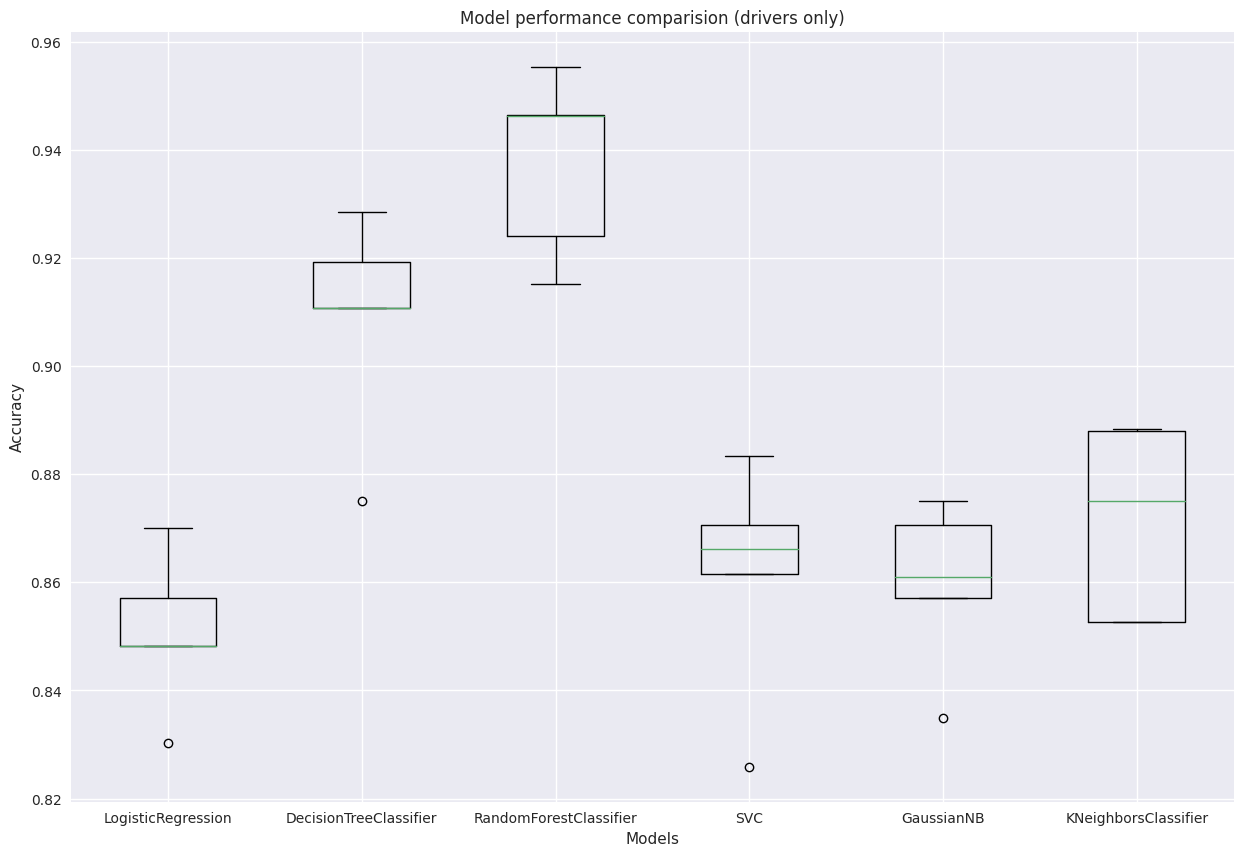

In [48]:

plt.figure(figsize=(15,10))
plt.boxplot(x=results_dri,labels=name_dri)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model performance comparision (drivers only)')
plt.show()



In [50]:
x_c = data[['GP_name','driver_name','quali_pos','const_reliability']]
y_c = data['finish_pos'].apply(lambda x: position_index(x))


In [51]:
x_c

,GP_name,driver_name,quali_pos,const_reliability
97,Albert Park Grand Prix Circuit,Alexander Albon,20,0.482143
98,Albert Park Grand Prix Circuit,Alexander Albon,8,0.482143
100,Albert Park Grand Prix Circuit,Nicholas Latifi,18,0.482143
101,Albert Park Grand Prix Circuit,Logan Sargeant,18,0.482143
140,Albert Park Grand Prix Circuit,Daniel Ricciardo,7,0.705357
...,...,...,...,...
9800,Losail International Circuit,Antonio Giovinazzi,18,0.428571
9801,Losail International Circuit,Mick Schumacher,19,0.378378
9802,Losail International Circuit,Nikita Mazepin,20,0.378378
9803,Losail International Circuit,Pierre Gasly,2,0.562500


In [60]:
x_c['GP_name']=le.fit_transform(x_d['GP_name'])
x_c['driver_name'] = le.fit_transform(x_d['driver_name'])
x_c

,GP_name,driver_name,quali_pos,const_reliability
97,0,0,20,0.482143
98,0,0,8,0.482143
100,0,17,18,0.482143
101,0,14,18,0.482143
140,0,4,7,0.705357
...,...,...,...,...
9800,18,1,18,0.428571
9801,18,16,19,0.378378
9802,18,19,20,0.378378
9803,18,22,2,0.562500


In [52]:
y_c

97      2
98      2
100     2
101     2
140     2
       ..
9800    2
9801    2
9802    2
9803    4
9804    2
Name: finish_pos, Length: 1119, dtype: int64

In [61]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_const = []
results_const = []
name_const = []
for model in models:
    cv = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
    result = cross_val_score(model,x_d,y_d,cv=cv,scoring='accuracy')
    print(result)
    mean_results_const.append(result.mean())
    results_const.append(result)
    name_const.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

[0.83035714 0.84821429 0.85714286 0.84821429 0.86995516]
LogisticRegression : 0.8507767456758488
[0.87053571 0.90625    0.91964286 0.91071429 0.93721973]
DecisionTreeClassifier : 0.9088725176169122
[0.91071429 0.9375     0.95535714 0.92857143 0.95067265]
RandomForestClassifier : 0.9365631005765535
[0.82589286 0.86160714 0.86607143 0.87053571 0.88340807]
SVC : 0.8615030429212045
[0.83482143 0.87053571 0.875      0.85714286 0.86098655]
GaussianNB : 0.8596973094170404
[0.85267857 0.85267857 0.88839286 0.875      0.88789238]
KNeighborsClassifier : 0.871328475336323


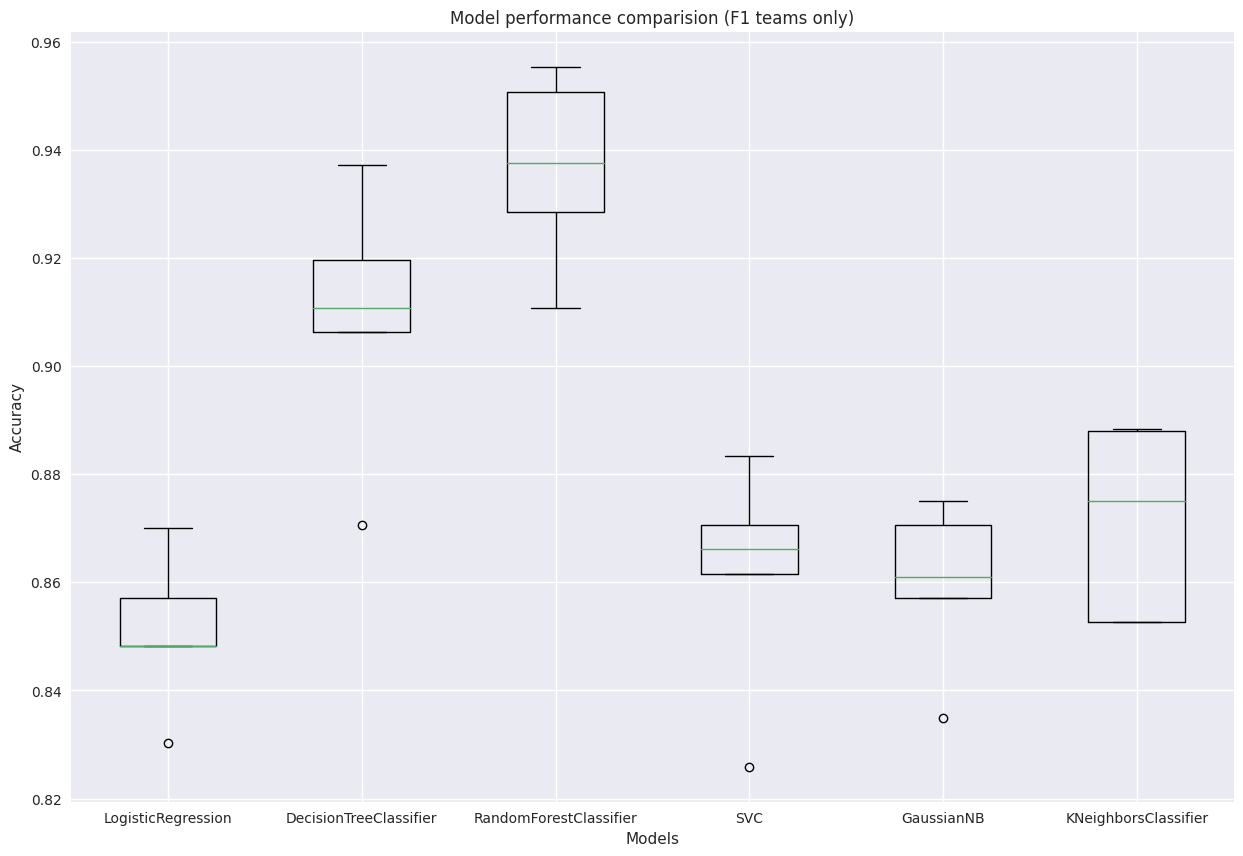

In [62]:
plt.figure(figsize=(15,10))
plt.boxplot(x=results_const,labels=name_const)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model performance comparision (F1 teams only)')
plt.show()


In [63]:
x_final = data[['GP_name','driver_name','quali_pos','driver_confidence','const_reliability']]
y_final = data['finish_pos'].apply(lambda x: position_index(x))

In [64]:
x_final

,GP_name,driver_name,quali_pos,driver_confidence,const_reliability
97,Albert Park Grand Prix Circuit,Alexander Albon,20,0.878788,0.482143
98,Albert Park Grand Prix Circuit,Alexander Albon,8,0.878788,0.482143
100,Albert Park Grand Prix Circuit,Nicholas Latifi,18,0.795455,0.482143
101,Albert Park Grand Prix Circuit,Logan Sargeant,18,0.833333,0.482143
140,Albert Park Grand Prix Circuit,Daniel Ricciardo,7,0.978261,0.705357
...,...,...,...,...,...
9800,Losail International Circuit,Antonio Giovinazzi,18,1.000000,0.428571
9801,Losail International Circuit,Mick Schumacher,19,0.930233,0.378378
9802,Losail International Circuit,Nikita Mazepin,20,0.863636,0.378378
9803,Losail International Circuit,Pierre Gasly,2,0.892857,0.562500


In [65]:
x_final['GP_name']=le.fit_transform(x_d['GP_name'])
x_final['driver_name'] = le.fit_transform(x_d['driver_name'])
x_final

,GP_name,driver_name,quali_pos,driver_confidence,const_reliability
97,0,0,20,0.878788,0.482143
98,0,0,8,0.878788,0.482143
100,0,17,18,0.795455,0.482143
101,0,14,18,0.833333,0.482143
140,0,4,7,0.978261,0.705357
...,...,...,...,...,...
9800,18,1,18,1.000000,0.428571
9801,18,16,19,0.930233,0.378378
9802,18,19,20,0.863636,0.378378
9803,18,22,2,0.892857,0.562500


In [66]:
y_final

97      2
98      2
100     2
101     2
140     2
       ..
9800    2
9801    2
9802    2
9803    4
9804    2
Name: finish_pos, Length: 1119, dtype: int64

In [69]:
models = [LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),SVC(),GaussianNB(),KNeighborsClassifier()]
names = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','GaussianNB','KNeighborsClassifier']
model_dict = dict(zip(models,names))
mean_results_combined = []
results_combined = []
name_combined = []
for model in models:
    cv = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
    result = cross_val_score(model,x_d,y_d,cv=cv,scoring='accuracy')
    print(result)
    mean_results_combined.append(result.mean())
    results_combined.append(result)
    name_combined.append(model_dict[model])
    print(f'{model_dict[model]} : {result.mean()}')

[0.83035714 0.84821429 0.85714286 0.84821429 0.86995516]
LogisticRegression : 0.8507767456758488
[0.88392857 0.90178571 0.91517857 0.91071429 0.92376682]
DecisionTreeClassifier : 0.9070747918001281
[0.91517857 0.9375     0.95089286 0.92857143 0.95067265]
RandomForestClassifier : 0.9365631005765535
[0.82589286 0.86160714 0.86607143 0.87053571 0.88340807]
SVC : 0.8615030429212045
[0.83482143 0.87053571 0.875      0.85714286 0.86098655]
GaussianNB : 0.8596973094170404
[0.85267857 0.85267857 0.88839286 0.875      0.88789238]
KNeighborsClassifier : 0.871328475336323


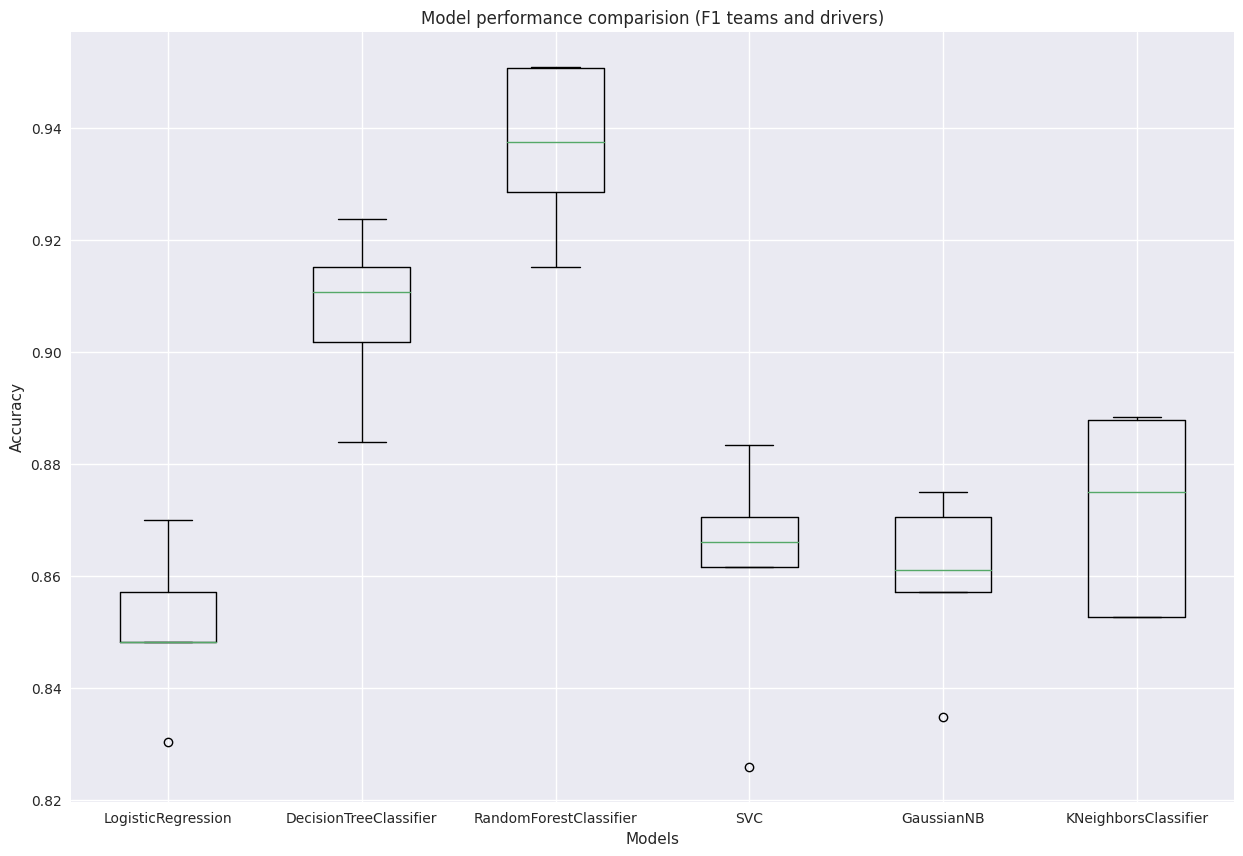

In [70]:
plt.figure(figsize=(15,10))
plt.boxplot(x=results_combined,labels=name_combined)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Model performance comparision (F1 teams and drivers)')
plt.show()